In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
carseats_df = pd.read_csv('Carseats.csv')
print(carseats_df[:4])

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  


* Classification Trees, using Carseats Dataset

 In these
data, Sales is a continuous variable, and so we begin by recoding it as a
binary variable. We use the ifelse() function to create a variable, called
High, which takes on a value of Yes if the Sales variable exceeds 8, and
takes on a value of No otherwise. Finally, we use the data.frame() function 
to merge High with the rest of the Carseats data.

In [3]:
carseats_df = pd.get_dummies(carseats_df, drop_first = True)
print(carseats_df[:5])

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   

   Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0         17               0                 0          1       1  
1         10               1                 0          1       1  
2         12               0                 1          1       1  
3         14               0                 1          1       1  
4         13               0                 0          1       0  


In [4]:
threshold = 8
carseats_df['High'] = carseats_df['Sales'].apply(lambda x: 'No' if x <= threshold else 'Yes')
print(carseats_df[:5])

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   

   Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes High  
0         17               0                 0          1       1  Yes  
1         10               1                 0          1       1  Yes  
2         12               0                 1          1       1  Yes  
3         14               0                 1          1       1   No  
4         13               0                 0          1       0   No  


* Fit Classification Tree

We now use the tree function to fit a classification tree in order to predict
High using all variables but Sales. The syntax of the treefunction is quite
similar to that of the lm function

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split

y = carseats_df['High']
X = carseats_df.drop(['High', 'Sales', 'Unnamed: 0'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [49]:
'''
Baseline DTs classification
'''
DTs_clf = DecisionTreeClassifier()
DTs_clf.fit(X_train, y_train)

y_hat = DTs_clf.predict(X_test)
print(confusion_matrix(y_test, y_hat))

[[50 12]
 [20 38]]


In [50]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00334821, 0.00334821, 0.00336134, 0.00338828,
        0.00343407, 0.00351891, 0.0047619 , 0.0047619 , 0.00535714,
        0.00566121, 0.00595238, 0.00595238, 0.00596591, 0.00619048,
        0.00635938, 0.00857143, 0.00872342, 0.00916577, 0.00952381,
        0.0095313 , 0.01042499, 0.01618382, 0.01653439, 0.01714286,
        0.02310172, 0.02311504, 0.02323255, 0.03969133, 0.07501996]),
 'impurities': array([0.        , 0.00669643, 0.01339286, 0.02011555, 0.03366866,
        0.04053679, 0.04757461, 0.05233651, 0.05709842, 0.0678127 ,
        0.07913513, 0.08508751, 0.09103989, 0.0970058 , 0.10938675,
        0.11574613, 0.12431756, 0.13304098, 0.14220675, 0.15173056,
        0.16126186, 0.21338681, 0.22957062, 0.24610501, 0.26324787,
        0.30945132, 0.33256636, 0.35579891, 0.39549024, 0.4705102 ])}

In [51]:
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00334821, 0.00334821, 0.00336134, 0.00338828,
       0.00343407, 0.00351891, 0.0047619 , 0.0047619 , 0.00535714,
       0.00566121, 0.00595238, 0.00595238, 0.00596591, 0.00619048,
       0.00635938, 0.00857143, 0.00872342, 0.00916577, 0.00952381,
       0.0095313 , 0.01042499, 0.01618382, 0.01653439, 0.01714286,
       0.02310172, 0.02311504, 0.02323255, 0.03969133, 0.07501996])

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
accuracy_cv = []
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha = alpha),
                              X = X_train,
                              y = y_train,
                              cv = 10,
                              scoring = 'accuracy')
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(
    list(ccp_alphas),
    columns = ['alpha']
)
output['accuracy_cv'] = accuracy_cv
output[:4]

,alpha,accuracy_cv
0,0.000000,0.696429
1,0.003348,0.685714
2,0.003348,0.689286
3,0.003361,0.703571


Optimal Alpha: 0.01042498895813908


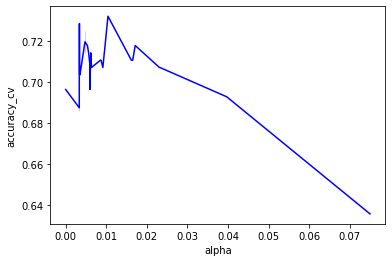

In [54]:
sns.lineplot(x = 'alpha', y = 'accuracy_cv',  data = output,
             color = 'b')
print(f"Optimal Alpha: {output.iloc[np.argmax(output['accuracy_cv']), 0]}")
plt.show()

In [55]:
DTs_clf2 = DecisionTreeClassifier(ccp_alpha = output.iloc[np.argmax(output['accuracy_cv']), 0])
DTs_clf2.fit(X_train, y_train)

y_hat2 = DTs_clf2.predict(X_test)
print(confusion_matrix(y_test, y_hat2))

[[53  9]
 [20 38]]
